In [1]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict, Literal

In [85]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int
    equation:str
    discriminant:float
    result:str

In [86]:
def show_equation(state:QuadState)->QuadState:
    a=state['a']
    b=state['b']
    c=state['c']

    eq=f'{a}x2{b}x+{c}'

    return{"equation":eq}

In [93]:
def cal_disctiminant(state:QuadState)->QuadState:
    a=state['a']
    b=state['b']
    c=state['c']
    disc=(b**2)-(4*a*c)
    print(type(disc))
    print("a",a, "b",b, "c",c)
    return {'discriminant':disc}


In [53]:
def no_real_roots(state:QuadState)->QuadState:
    
    
    return {"result":"No real roots"}

In [55]:
def real_roots(state:QuadState)->QuadState:
    d=state['discriminant']
    a=state['a']
    b=state['b']
    c=state['c']
    
    r1=(-b+d**0.5)/(2*a)
    r2=(-b-d**0.5)/(2*a)
    result=f'The roots are {r1} and {r2}'
    return {"result":result}


In [56]:
def repeated_roots(state:QuadState)->QuadState:
    
    a=state['a']
    b=state['b']
    
    result=f'The repeated roots is {(-b)/(2*a)}'
    return {"result": result}


In [76]:
def check_condition(state:QuadState)->Literal["no_real_roots", "real_roots","repeated_roots"]:
    d=state["discriminant"]
    if d>0:
        return "real_roots"
    elif d<0:
        "no_real_roots"
    else: "repeated_roots"

In [90]:
# Create graph
graph= StateGraph(QuadState)

# Add noods
graph.add_node("show_equation",show_equation)
graph.add_node("cal_disctiminant",cal_disctiminant)
graph.add_node("no_real_roots",no_real_roots)
graph.add_node("real_roots",real_roots)
graph.add_node("repeated_roots",repeated_roots )

# Add edges
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation","cal_disctiminant")
graph.add_conditional_edges("cal_disctiminant",check_condition)

graph.add_edge("no_real_roots", END)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)

# Compile the graph

workflow=graph.compile()

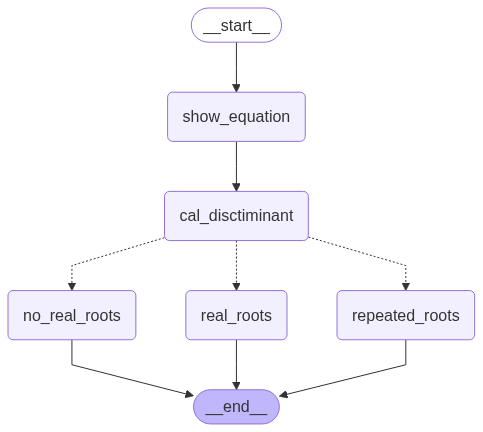

In [96]:
workflow

In [95]:
initial_state={
    "a":4,
    "b":2,
    "c":-4
}
workflow.invoke(initial_state)

<class 'int'>
a 4 b 2 c -4


{'a': 4,
 'b': 2,
 'c': -4,
 'equation': '4x22x+-4',
 'discriminant': 68,
 'result': 'The roots are 0.7807764064044151 and -1.2807764064044151'}